# Basic image processing

In [60]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
#from skimage import io # conda install scikit-image
from PIL import Image
import matplotlib as mpl
import ipywidgets as ipw
from scipy import ndimage

In [16]:
#im = io.imread("dots.jpg")
im = np.array(Image.open("dots.jpg"))
im = im[0:1600] #Removes the bottom of the image
im.shape

(1600, 1600, 3)

We have a color image (3 channels)

In [21]:
im = im[:,:,0] # we only keep the red channel since all channels are identical

<IPython.core.display.Javascript object>


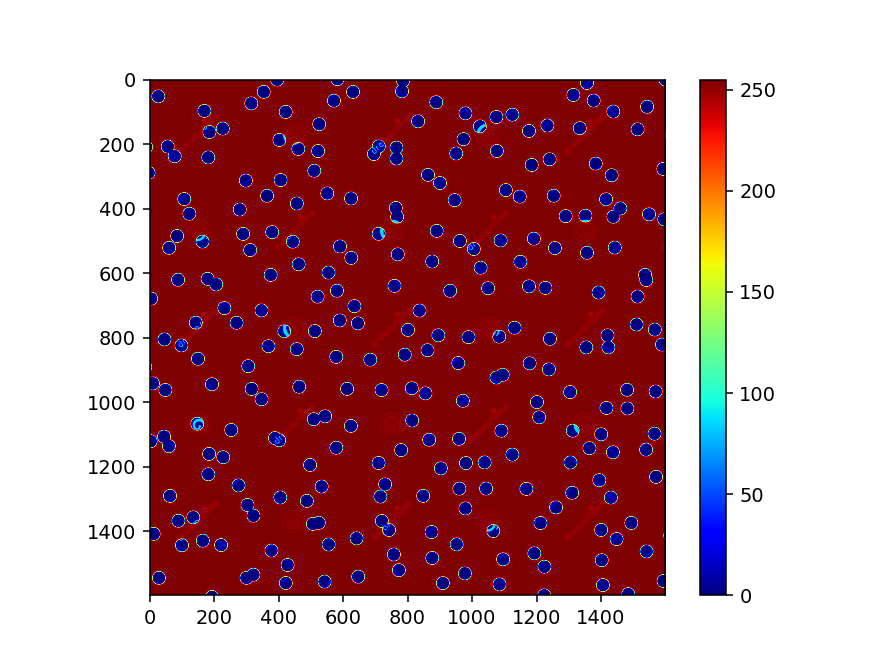

In [35]:
plt.figure()
plt.imshow(im, cmap = mpl.cm.jet)
plt.colorbar()
plt.show()

## Histogram 

<IPython.core.display.Javascript object>


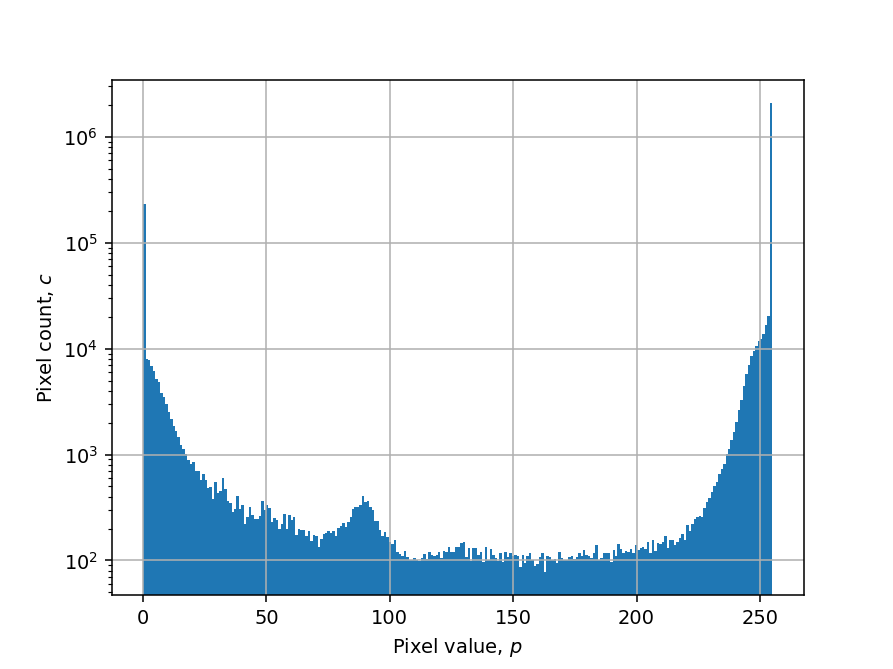

In [40]:
plt.figure()
plt.hist(im.flatten(), bins = 256)
plt.grid()
plt.xlabel("Pixel value, $p$")
plt.ylabel("Pixel count, $c$")
plt.yscale("log")
plt.show()

## Thresholding

In [56]:
#import ipywidgets as ipw

def threshold(thresh = 0):
    """
    Thresholding function.
    """
    imt = (im <= thresh) * 1 # Thresholded image
    return imt

@ipw.interact(thresh = (0, 255, 1)) 
def update(thresh = 0):
    imt = threshold(thresh)
    ims.set_array(imt)
    

imt = threshold(100)
plt.figure()
ims = plt.imshow(imt, cmap = mpl.cm.binary)
plt.colorbar()
plt.show()

interactive(children=(IntSlider(value=0, description='thresh', max=255), Output()), _dom_classes=('widget-inte…

<IPython.core.display.Javascript object>

## Labelization 

Let's use the `label` function in scipy:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.label.html

In [61]:
#from scipy import ndimage
imt = threshold(150)
iml, nl =  ndimage.label(imt)
iml

array([[0, 0, 0, ..., 6, 6, 6],
       [0, 0, 0, ..., 6, 6, 6],
       [0, 0, 0, ..., 6, 6, 6],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

<IPython.core.display.Javascript object>


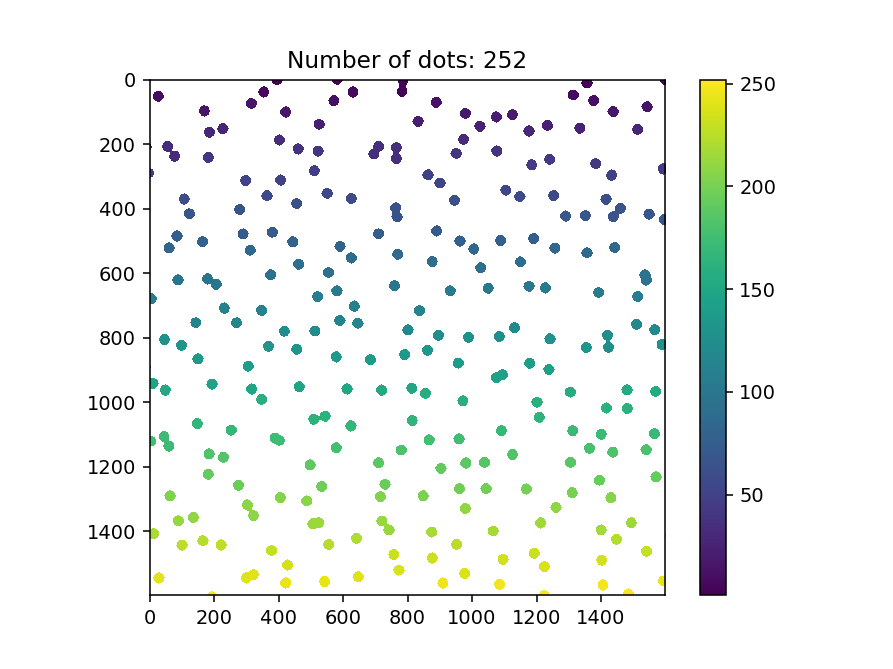

In [76]:
plt.figure()
plt.title("Number of dots: {0}".format(nl))
plt.imshow(np.where(iml>0, iml, np.nan))
plt.colorbar()
plt.show()

# Examples

In [24]:
a = np.arange(36).reshape(6,6)
a

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

In [25]:
a[1,0]

6

In [26]:
a[1:4]

array([[ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [28]:
a[:4]

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [29]:
a[:,3:5]

array([[ 3,  4],
       [ 9, 10],
       [15, 16],
       [21, 22],
       [27, 28],
       [33, 34]])

In [71]:
# Labelization
a = ((np.random.rand(36) > .75)*1).reshape(6,6)
a

array([[1, 1, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 0],
       [0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 1, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]])

In [72]:
b, n = ndimage.label(a)
b

array([[1, 1, 0, 0, 0, 2],
       [1, 1, 1, 1, 1, 0],
       [0, 0, 1, 0, 0, 3],
       [0, 0, 0, 0, 3, 3],
       [0, 4, 0, 0, 0, 0],
       [0, 0, 5, 0, 0, 0]], dtype=int32)

In [74]:
np.where(b>0, b, np.nan)


array([[ 1.,  1., nan, nan, nan,  2.],
       [ 1.,  1.,  1.,  1.,  1., nan],
       [nan, nan,  1., nan, nan,  3.],
       [nan, nan, nan, nan,  3.,  3.],
       [nan,  4., nan, nan, nan, nan],
       [nan, nan,  5., nan, nan, nan]])